In [1]:
#Reading the data
import pandas as pd
data = pd.read_csv("Amazon Sale Report.csv",encoding='latin1')

C:\Users\user\AppData\Local\Temp\ipykernel_14772\1461423437.py:3: DtypeWarning: Columns (21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Amazon Sale Report.csv",encoding='latin1')


# Step1: Exploratory Data Analaysis

## 1.Data Inspection

In [2]:
data.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3.0,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4.0,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [3]:
data.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128940.000000
mean,64487.000000,0.904431,648.561465,463969.927594
std,37232.019822,0.313354,281.211687,191475.956294
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128977 entries, 0 to 128976
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  float64
 1   Order ID            128977 non-null  object 
 2   Date                128977 non-null  object 
 3   Status              128977 non-null  object 
 4   Fulfilment          128977 non-null  object 
 5   Sales Channel       128977 non-null  object 
 6   ship-service-level  128977 non-null  object 
 7   Style               128977 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  float64
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [5]:
#checking for null values
missing_values = data.isnull().sum()
missing_values

index                     2
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       2
Category                  2
Size                      2
ASIN                      2
Courier Status         6874
Qty                       2
currency               7797
Amount                 7797
ship-city                35
ship-state               37
ship-postal-code         37
ship-country             37
promotion-ids         49157
B2B                       4
fulfilled-by          89702
Unnamed: 22           49054
dtype: int64

In [11]:
summary = data.describe().transpose()

summary

,count,mean,std,min,25%,50%,75%,max
index,128975.0,64487.000000,37232.019822,0.0,32243.5,64487.0,96730.5,128974.0
Qty,128975.0,0.904431,0.313354,0.0,1.0,1.0,1.0,15.0
Amount,121180.0,648.561465,281.211687,0.0,449.0,605.0,788.0,5584.0
ship-postal-code,128940.0,463969.927594,191475.956294,110001.0,382421.0,500033.0,600024.0,989898.0


## 2. Summary Statistics

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

### Numerical columns

In [7]:
numerical_columns = data.select_dtypes(include=['float64']).columns

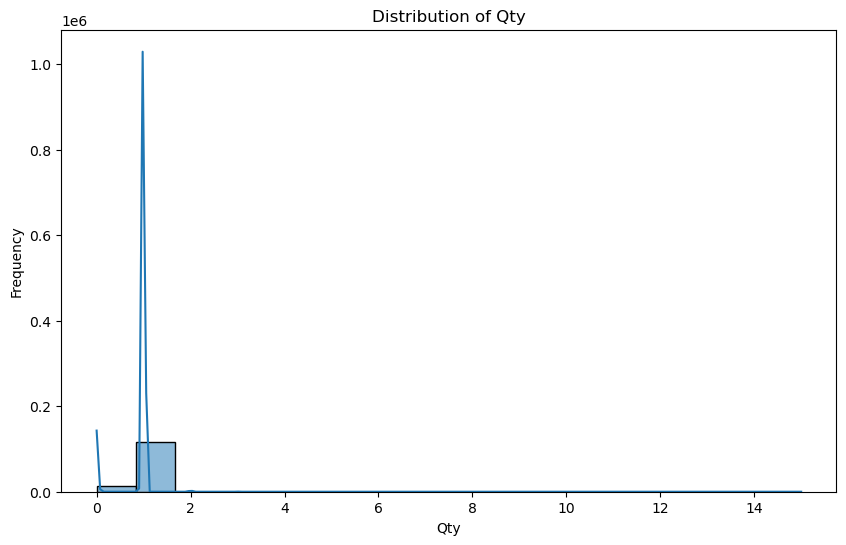

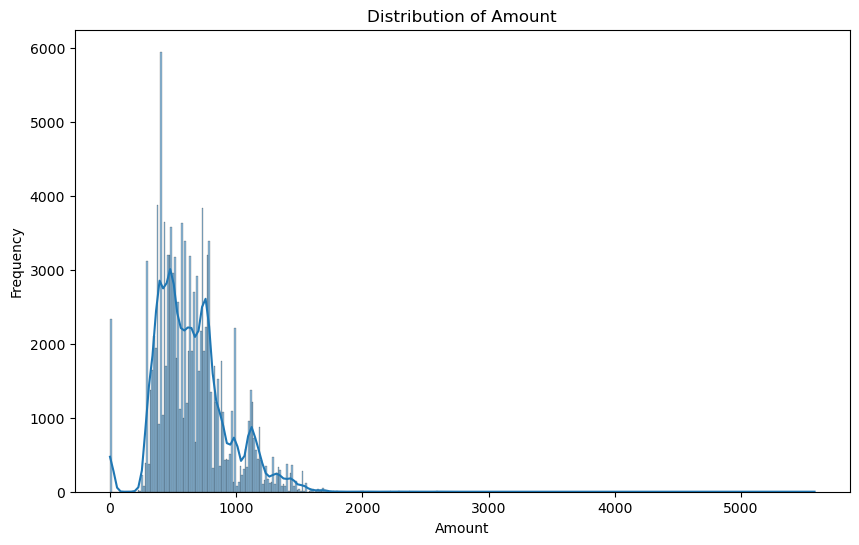

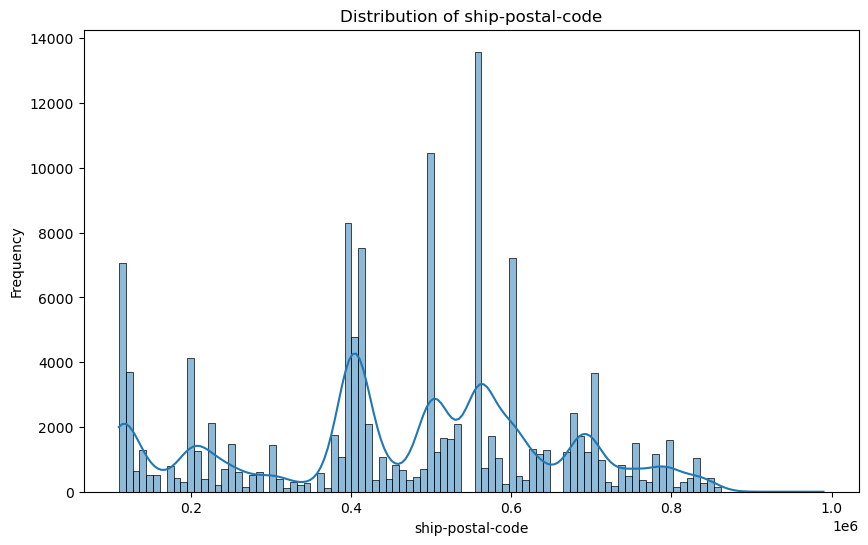

In [8]:
for column in numerical_columns[1:]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Categorial columns

In [13]:
categorical_columns = data.select_dtypes(include=['object']).columns


In [14]:
categorical_summary = data[categorical_columns].describe().transpose()

categorical_summary

,count,unique,top,freq
Order ID,128977,120379,171-5057375-2831560,12
Date,128977,92,05-03-22,2085
Status,128977,14,Shipped,77804
Fulfilment,128977,4,Amazon,89698
Sales Channel,128977,3,Amazon.in,128851
ship-service-level,128977,3,Expedited,88615
Style,128977,1378,JNE3797,4224
SKU,128975,7195,JNE3797-KR-L,773
Category,128975,9,Set,50284
Size,128975,11,M,22711


In [15]:
categorial_visualization=[col for col in categorical_columns if data[col].nunique() < 15]

In [16]:
#function for visualization
def visualize_distributions(data, column_name):
    # Set plot style
    sns.set(style="whitegrid")

    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=column_name, order=data[column_name].value_counts().index)
    plt.title(column_name)
    plt.xticks(rotation=45)
    plt.show()
    

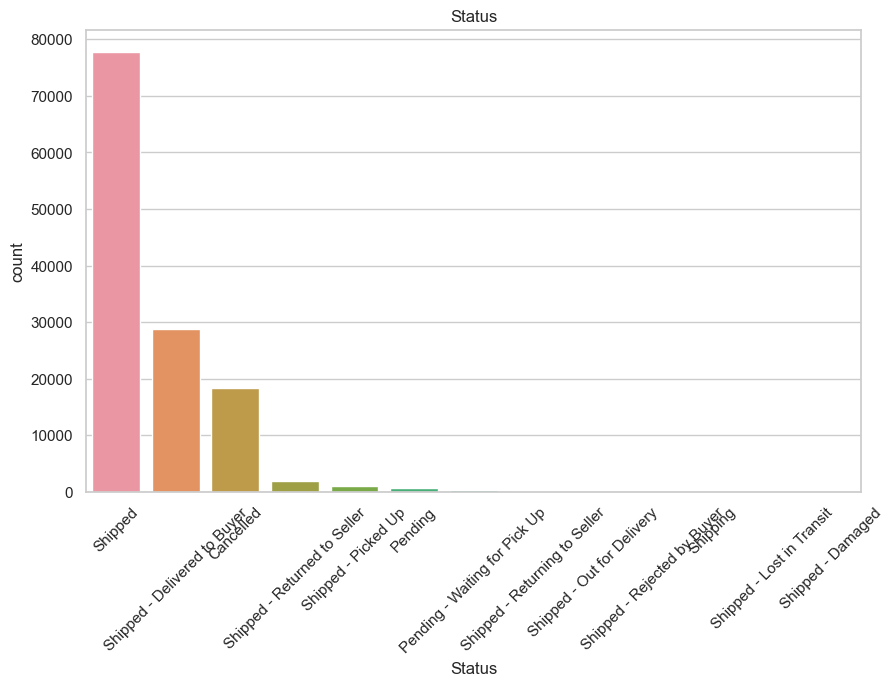

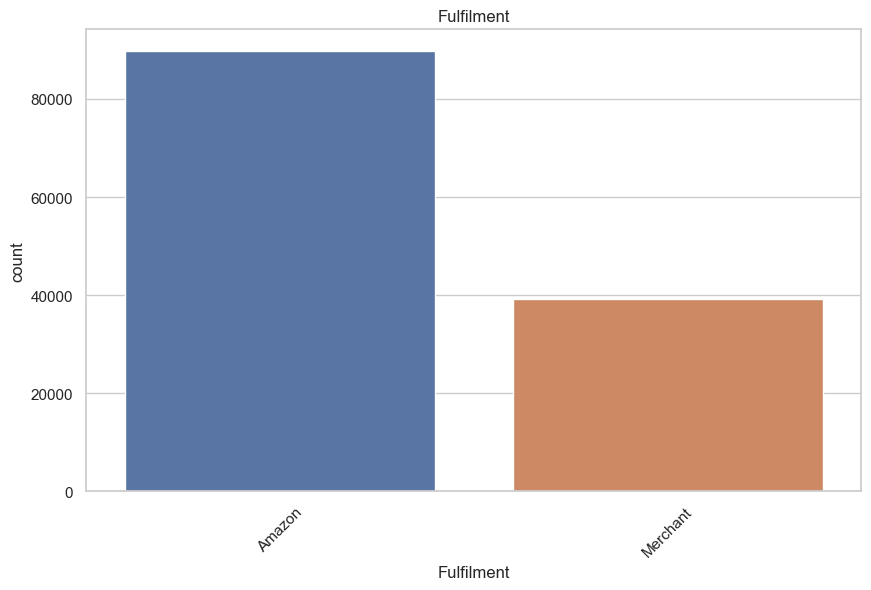

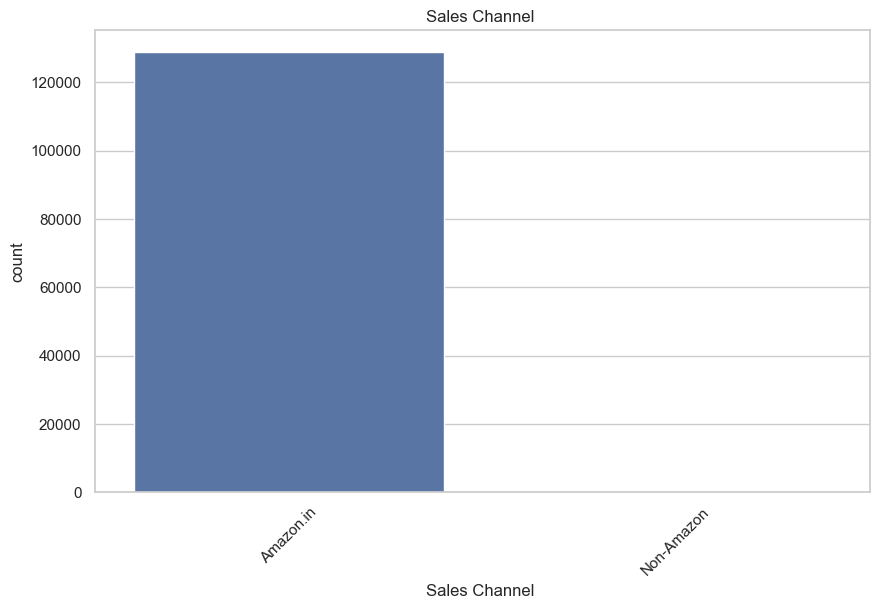

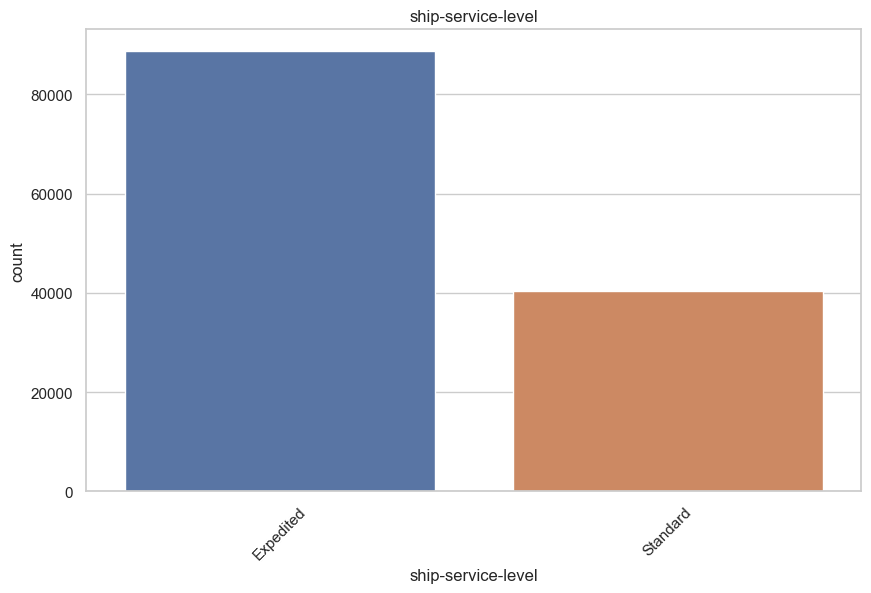

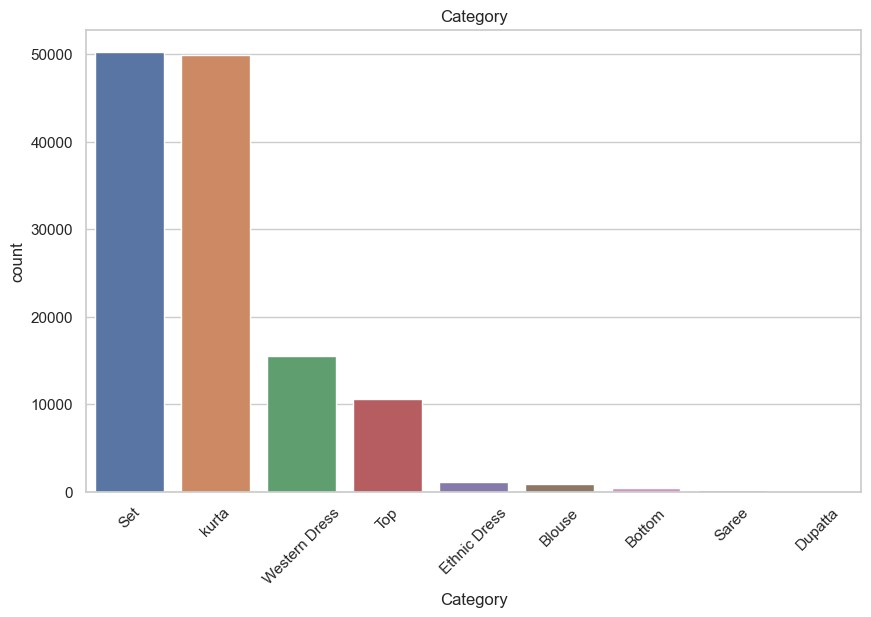

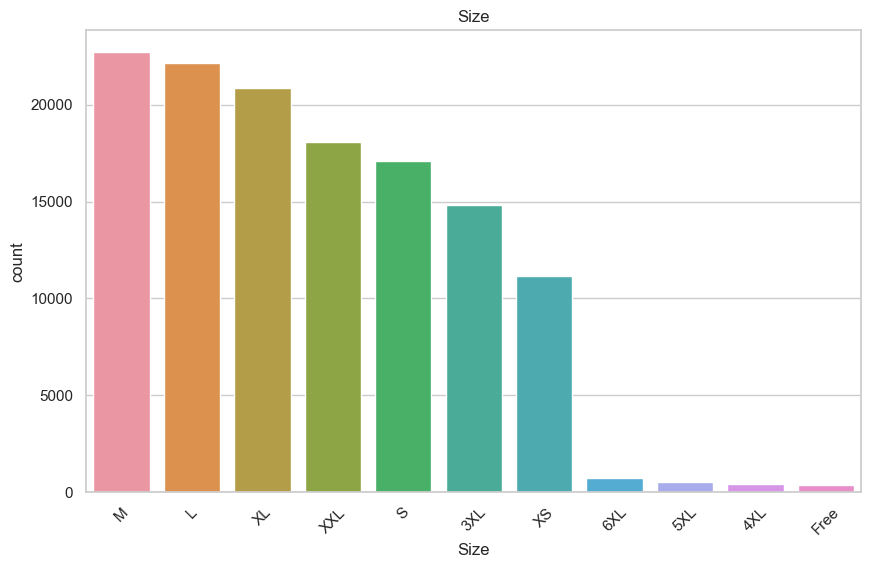

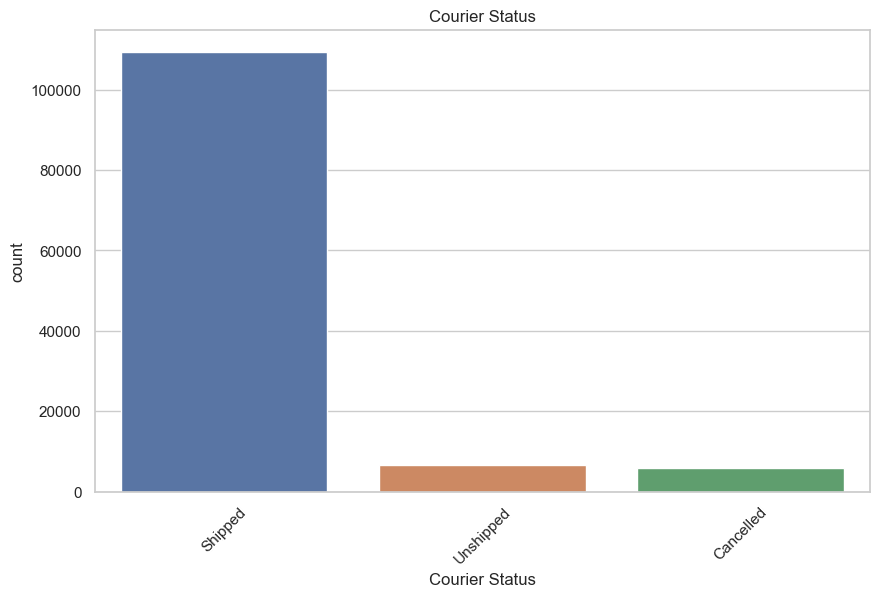

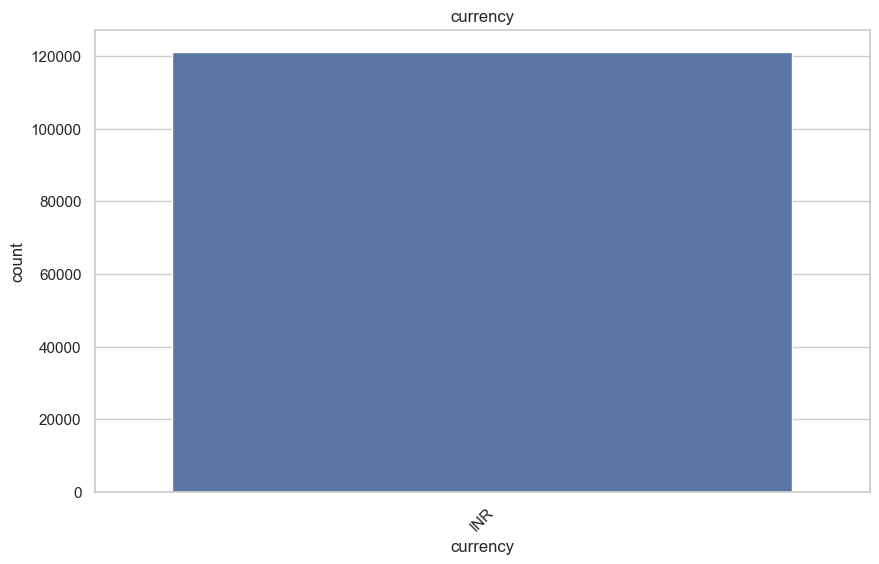

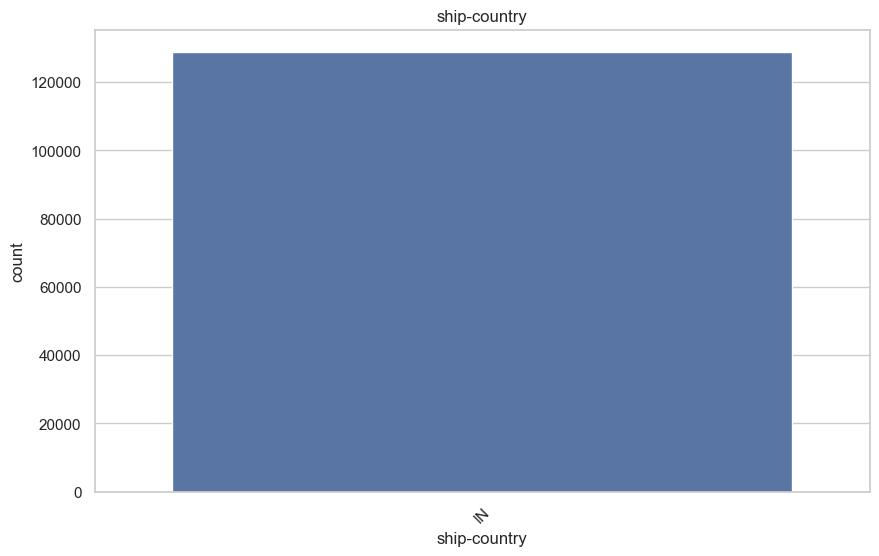

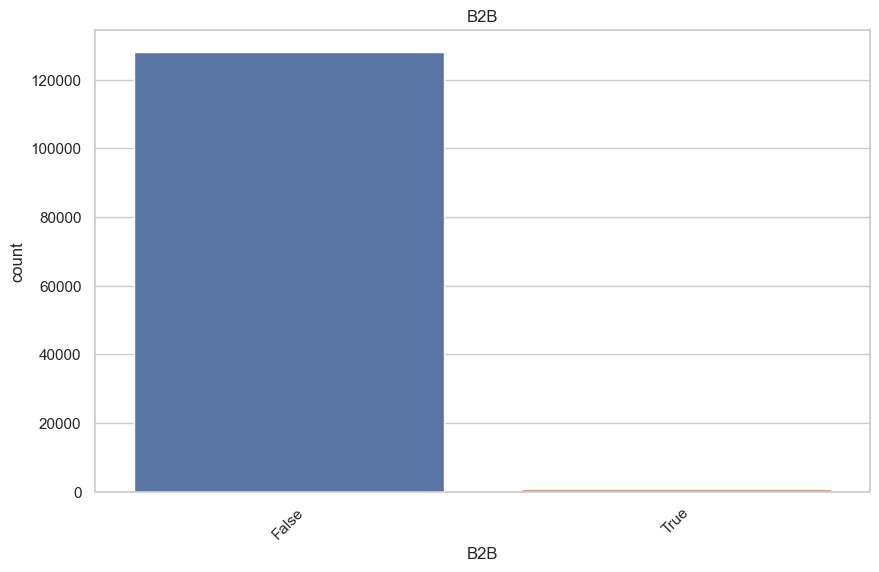

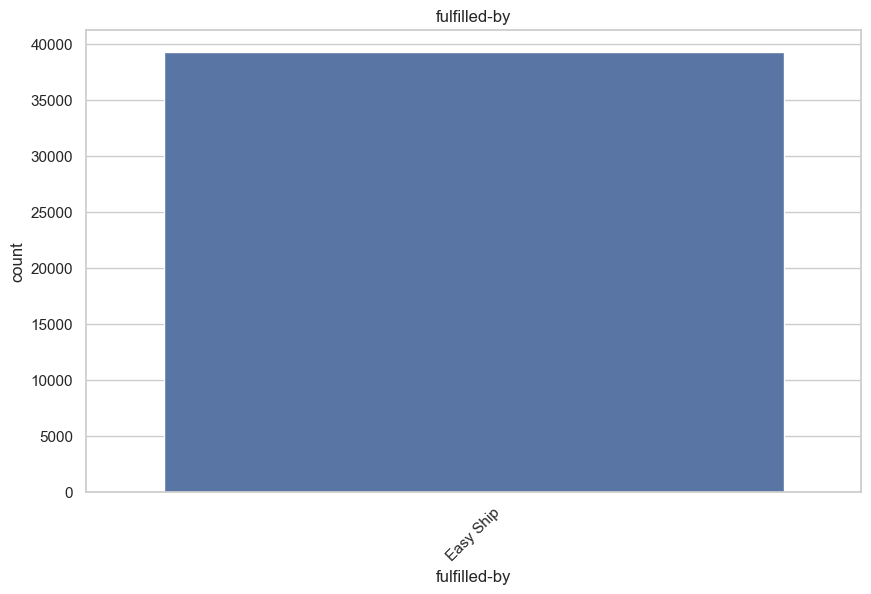

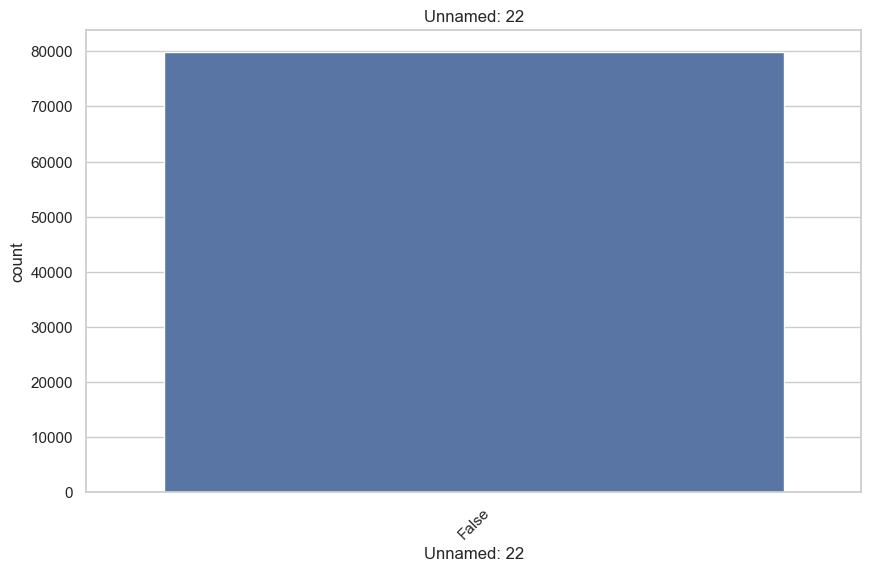

In [ ]:
# Filter the DataFrame
filtered_df = data[data['Fulfilment'].isin(['Amazon', 'Merchant'])]
# Select only the columns in categorial_visualization
filtered_df = filtered_df[categorial_visualization]
# Iterate over the categorical columns for visualization
for column in categorial_visualization:
    visualize_distributions(filtered_df, column)


# Insights:
## 1.